# 2023 Travelers Analytics Case Competition
* InsNova Auto Insurance Company Modeling Problem

In [58]:
from google.colab import drive
drive.mount('/content/mydrive')

Drive already mounted at /content/mydrive; to attempt to forcibly remount, call drive.mount("/content/mydrive", force_remount=True).


In [130]:
# Impoerting Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing and metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Modeling Libraries
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [60]:
# Reading Data from Drive
df_train = pd.read_csv('/content/mydrive/MyDrive/Travellers - Data/2023-travelers-university-competition/InsNova_data_2023_train.csv')
df_test = pd.read_csv('/content/mydrive/MyDrive/Travellers - Data/2023-travelers-university-competition/InsNova_data_2023_vh.csv')

In [61]:
df_train.head()

,id,veh_value,exposure,veh_body,veh_age,gender,area,agecat,engine_type,max_power,...,marital_status,e_bill,time_of_week_driven,time_driven,trm_len,credit_score,high_education_ind,clm,numclaims,claimcst0
0,1,0.77,0.444504,SEDAN,4,M,D,3,petrol,147,...,S,1,weekday,6pm - 12am,6,640.448137,1.0,0,0,0.0
1,2,4.45,0.562183,STNWG,1,M,A,3,petrol,158,...,S,1,weekday,6am - 12pm,12,683.749691,0.0,0,0,0.0
2,3,4.90,0.465244,STNWG,1,F,A,3,petrol,159,...,M,1,weekday,6pm - 12am,6,653.656117,1.0,0,0,0.0
3,4,0.48,0.271039,PANVN,4,M,A,4,petrol,80,...,S,1,weekday,12pm - 6pm,12,642.574671,0.0,0,0,0.0
4,5,0.85,0.141624,SEDAN,4,F,A,5,petrol,126,...,S,0,weekday,6am - 12pm,6,647.175035,0.0,0,0,0.0


In [62]:
df_test.head()

,id,veh_value,exposure,veh_body,veh_age,gender,area,agecat,engine_type,max_power,driving_history_score,veh_color,marital_status,e_bill,time_of_week_driven,time_driven,trm_len,credit_score,high_education_ind
0,1,3.40,0.076279,STNWG,2,M,B,4,petrol,174,83,black,S,1,weekday,6pm - 12am,6,648.247594,0
1,2,2.55,0.093443,STNWG,2,F,A,3,petrol,181,65,yellow,M,0,weekday,12am - 6 am,12,637.752677,0
2,3,3.04,0.157762,STNWG,2,F,E,4,petrol,136,64,white,S,1,weekday,12pm - 6pm,12,661.483786,0
3,4,2.05,0.560735,MIBUS,4,M,C,6,dissel,164,82,gray,M,1,weekday,6am - 12pm,12,647.846365,0
4,5,1.93,0.258275,HBACK,2,M,C,4,dissel,89,48,black,S,0,weekday,6am - 12pm,12,640.257550,0


In [63]:
# Shape of train and test data
x = df_train.shape
y = df_test.shape
print('Shape of training data : ',x, "  ", 'Shape of testing data : ',y)

Shape of training data :  (22619, 22)    Shape of testing data :  (22620, 19)


In [64]:
# Descriptive Analysis of the data
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,22619.0,11310.000000,6529.687205,1.000000,5655.500000,11310.000000,16964.500000,22619.000000
veh_value,22619.0,1.868948,1.278588,0.000000,1.070000,1.570000,2.260000,24.510000
exposure,22619.0,0.433038,0.272899,0.001754,0.203696,0.384313,0.643316,0.999378
veh_age,22619.0,2.667492,1.070555,1.000000,2.000000,3.000000,4.000000,4.000000
agecat,22619.0,3.481675,1.420252,1.000000,2.000000,3.000000,5.000000,6.000000
max_power,22619.0,152.447765,51.834156,60.000000,115.000000,144.000000,180.000000,409.000000
driving_history_score,22619.0,70.868341,19.083318,1.000000,58.000000,72.000000,86.000000,99.000000
e_bill,22619.0,0.636810,0.480930,0.000000,0.000000,1.000000,1.000000,1.000000
trm_len,22619.0,10.493833,2.601685,6.000000,6.000000,12.000000,12.000000,12.000000
credit_score,22619.0,649.875077,10.515364,607.797435,643.134748,647.180197,654.069205,790.360253


In [65]:
# Getting the basic information about columns
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22619 entries, 0 to 22618
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     22619 non-null  int64  
 1   veh_value              22619 non-null  float64
 2   exposure               22619 non-null  float64
 3   veh_body               22619 non-null  object 
 4   veh_age                22619 non-null  int64  
 5   gender                 22619 non-null  object 
 6   area                   22619 non-null  object 
 7   agecat                 22619 non-null  int64  
 8   engine_type            22619 non-null  object 
 9   max_power              22619 non-null  int64  
 10  driving_history_score  22619 non-null  float64
 11  veh_color              22619 non-null  object 
 12  marital_status         22619 non-null  object 
 13  e_bill                 22619 non-null  int64  
 14  time_of_week_driven    22619 non-null  object 
 15  ti

<ipython-input-66-364238c1f95a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_train.corr()


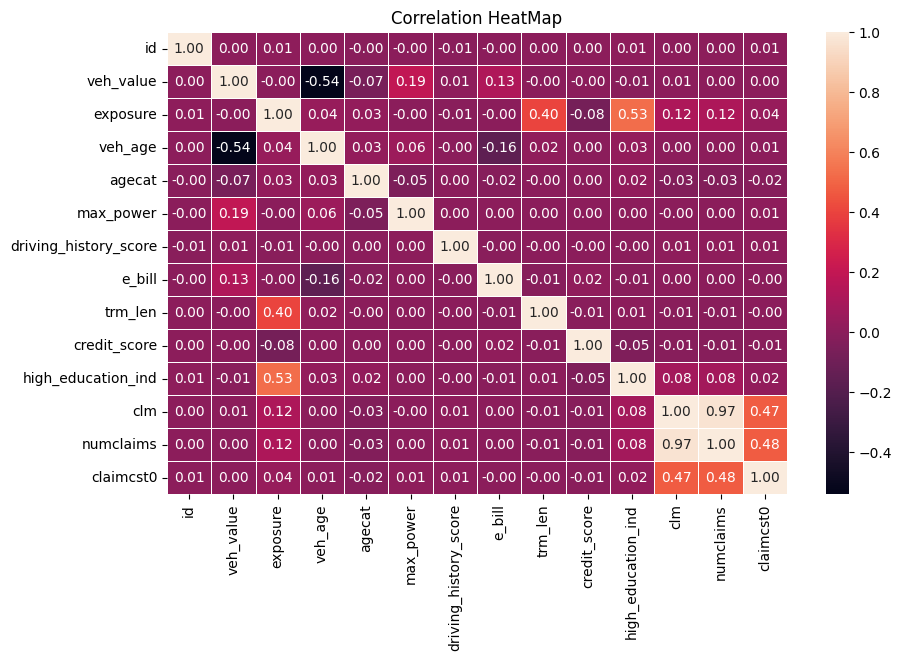

In [66]:
# Correlation Matrix
corr_matrix = df_train.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix,annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation HeatMap")
plt.show()

* Col 'clm' and 'numclaims' are positively correlated having a correlation of 0.97, which could be useful in feature selection

In [67]:
# Checking Null values in training and testing data
print("Total number of Null values in training data:",df_train.isna().sum().sum())
print("Total number of Null values in testing data:",df_test.isna().sum().sum())

Total number of Null values in training data: 0
Total number of Null values in testing data: 0


In [68]:
# List of all columns in training data
col_list  = df_train.columns.tolist()
print(col_list)

['id', 'veh_value', 'exposure', 'veh_body', 'veh_age', 'gender', 'area', 'agecat', 'engine_type', 'max_power', 'driving_history_score', 'veh_color', 'marital_status', 'e_bill', 'time_of_week_driven', 'time_driven', 'trm_len', 'credit_score', 'high_education_ind', 'clm', 'numclaims', 'claimcst0']


In [69]:
categorical_col = df_train.select_dtypes(include='object').columns.tolist()
print(categorical_col)

['veh_body', 'gender', 'area', 'engine_type', 'veh_color', 'marital_status', 'time_of_week_driven', 'time_driven']


In [70]:
# Distribution of categorical variables
df_train['veh_body'].value_counts()

SEDAN    7376
HBACK    6305
STNWG    5436
UTE      1530
TRUCK     586
HDTOP     510
COUPE     279
MIBUS     253
PANVN     248
MCARA      40
CONVT      28
BUS        19
RDSTR       9
Name: veh_body, dtype: int64

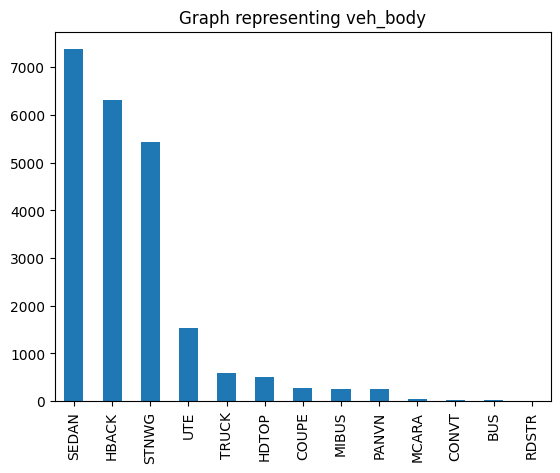

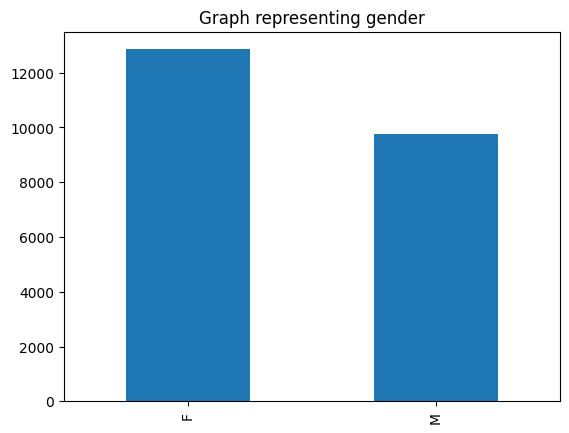

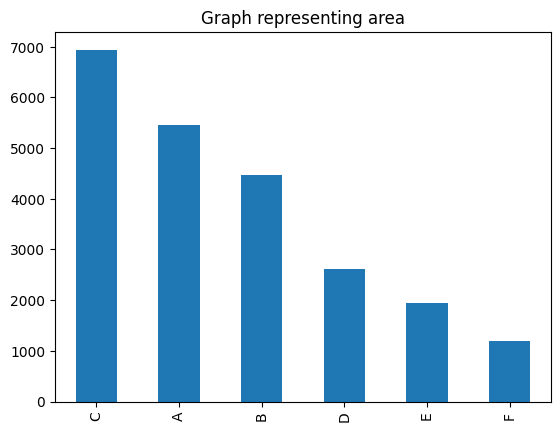

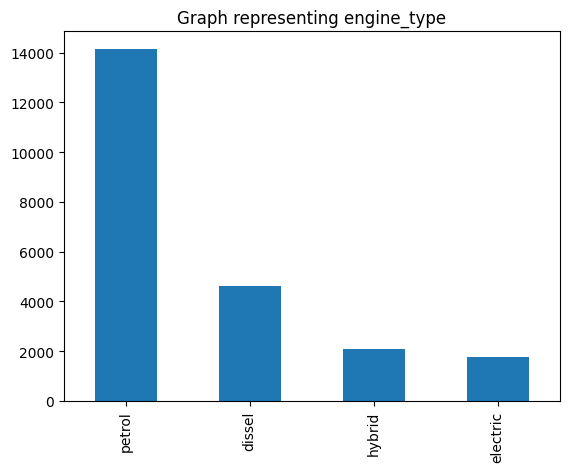

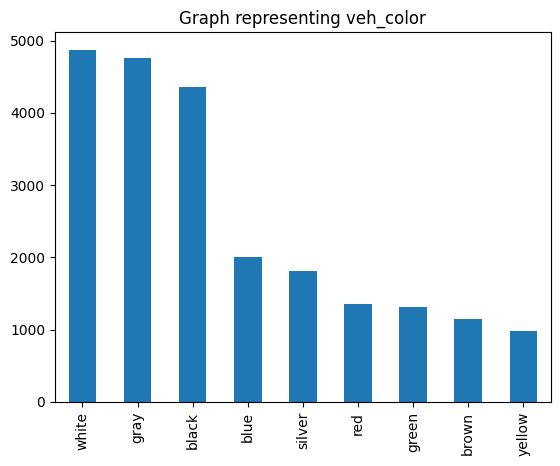

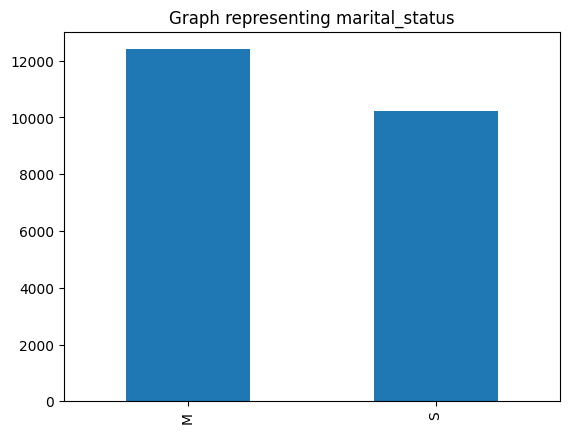

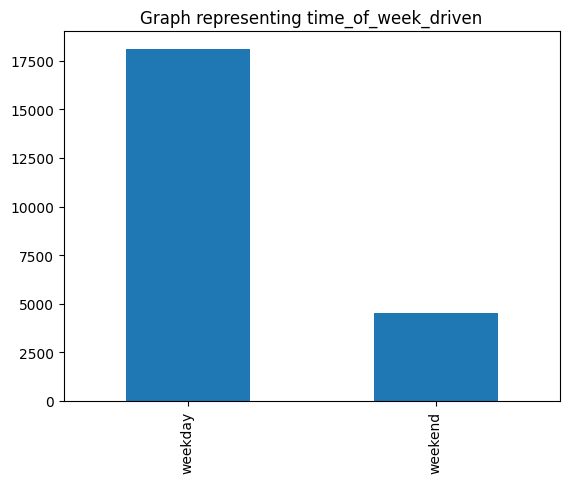

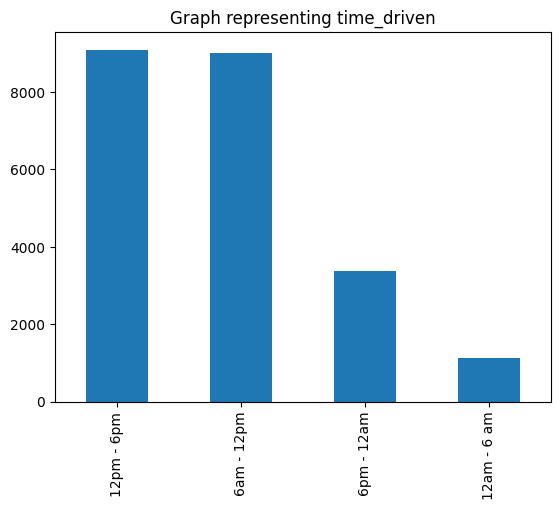

In [71]:
for i in categorical_col:
  df_train[i].value_counts().plot(kind='bar')
  plt.title(f'Graph representing {i}')
  plt.show()

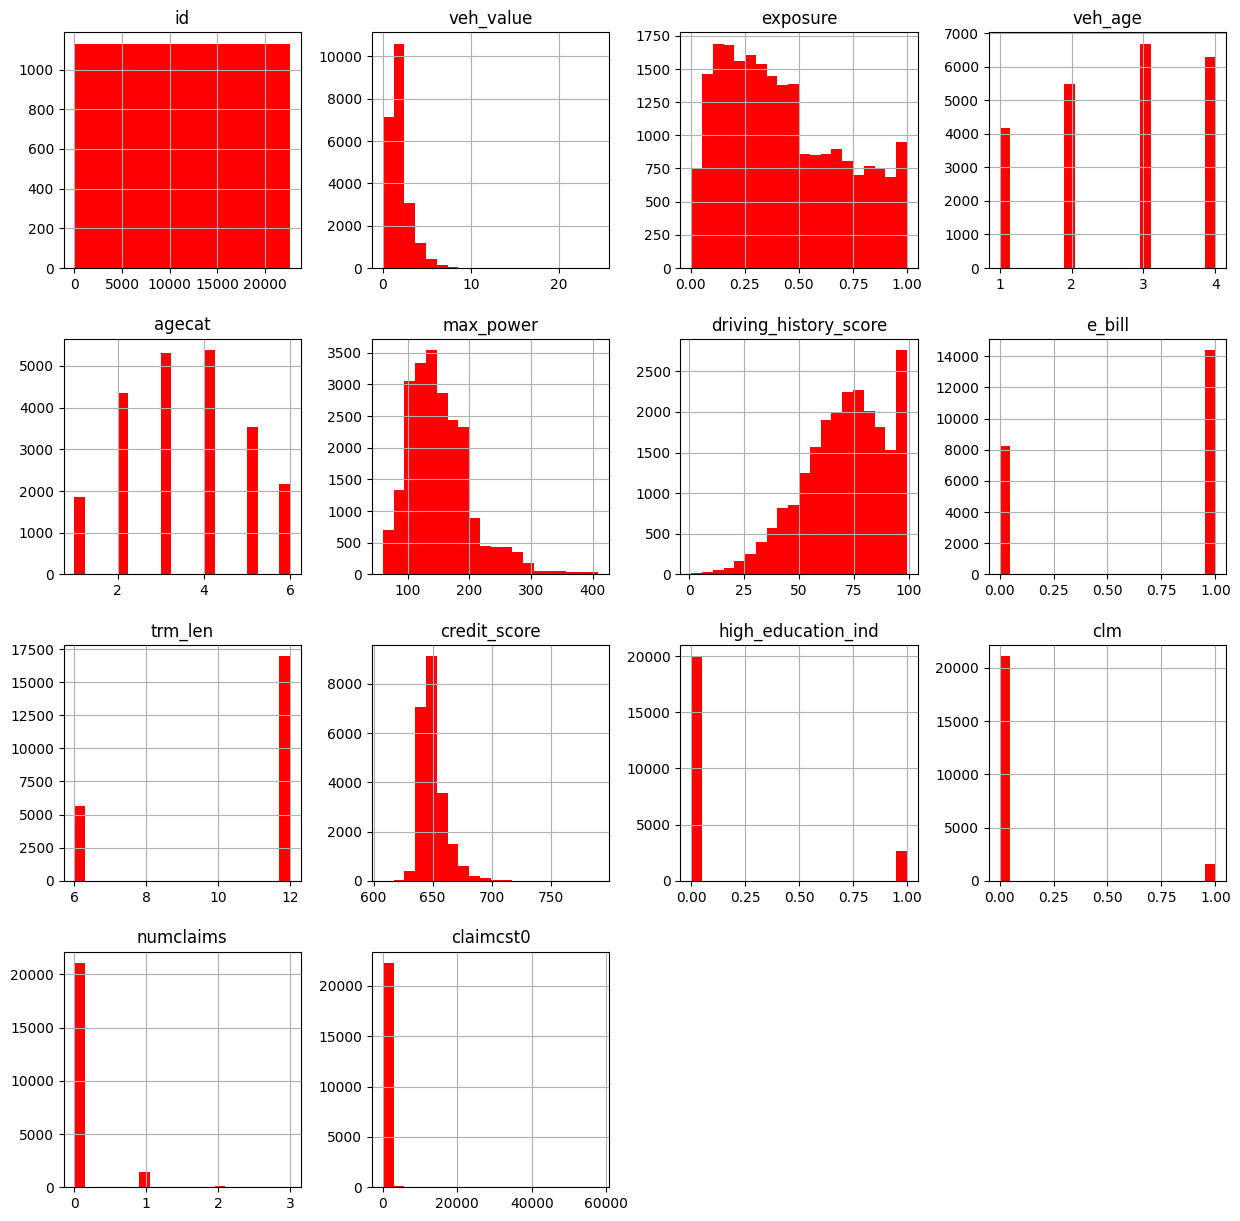

In [72]:

df_train.hist(bins=20,figsize=(15,15),color='red')
plt.show()

In [73]:
# Method to calculate memory usage in bytes for each column
df_train.memory_usage()

Index                       128
id                       180952
veh_value                180952
exposure                 180952
veh_body                 180952
veh_age                  180952
gender                   180952
area                     180952
agecat                   180952
engine_type              180952
max_power                180952
driving_history_score    180952
veh_color                180952
marital_status           180952
e_bill                   180952
time_of_week_driven      180952
time_driven              180952
trm_len                  180952
credit_score             180952
high_education_ind       180952
clm                      180952
numclaims                180952
claimcst0                180952
dtype: int64

In [74]:
# Encoding Categorical Data
label_encoder = LabelEncoder()
df_train_encoded = df_train.copy()
df_test_encoded = df_test.copy()

for col in categorical_col:
  df_train_encoded[col+'_encoded'] = label_encoder.fit_transform(df_train[col])
  df_test_encoded[col+'_encoded'] = label_encoder.fit_transform(df_test[col])


In [75]:
df_train_encoded.head()

,id,veh_value,exposure,veh_body,veh_age,gender,area,agecat,engine_type,max_power,...,numclaims,claimcst0,veh_body_encoded,gender_encoded,area_encoded,engine_type_encoded,veh_color_encoded,marital_status_encoded,time_of_week_driven_encoded,time_driven_encoded
0,1,0.77,0.444504,SEDAN,4,M,D,3,petrol,147,...,0,0.0,9,1,3,3,0,1,0,3
1,2,4.45,0.562183,STNWG,1,M,A,3,petrol,158,...,0,0.0,10,1,0,3,7,1,0,2
2,3,4.90,0.465244,STNWG,1,F,A,3,petrol,159,...,0,0.0,10,0,0,3,0,0,0,3
3,4,0.48,0.271039,PANVN,4,M,A,4,petrol,80,...,0,0.0,7,1,0,3,7,1,0,1
4,5,0.85,0.141624,SEDAN,4,F,A,5,petrol,126,...,0,0.0,9,0,0,3,7,1,0,2


In [76]:
df_test_encoded.head()

,id,veh_value,exposure,veh_body,veh_age,gender,area,agecat,engine_type,max_power,...,credit_score,high_education_ind,veh_body_encoded,gender_encoded,area_encoded,engine_type_encoded,veh_color_encoded,marital_status_encoded,time_of_week_driven_encoded,time_driven_encoded
0,1,3.40,0.076279,STNWG,2,M,B,4,petrol,174,...,648.247594,0,10,1,1,3,0,1,0,3
1,2,2.55,0.093443,STNWG,2,F,A,3,petrol,181,...,637.752677,0,10,0,0,3,8,0,0,0
2,3,3.04,0.157762,STNWG,2,F,E,4,petrol,136,...,661.483786,0,10,0,4,3,7,1,0,1
3,4,2.05,0.560735,MIBUS,4,M,C,6,dissel,164,...,647.846365,0,6,1,2,0,3,0,0,2
4,5,1.93,0.258275,HBACK,2,M,C,4,dissel,89,...,640.257550,0,3,1,2,0,0,1,0,2


In [77]:
# Dropping Categorical Variables from training and testing data
df_train_encoded = df_train_encoded.drop(columns=categorical_col, axis=1)
df_test_encoded = df_test_encoded.drop(columns=categorical_col, axis=1)

In [88]:
# Creating predicted and predictor variables
y = df_train_encoded['claimcst0']  # Predicted Variable
X = df_train_encoded.drop(columns=['claimcst0','id','clm','numclaims'], axis=1) # Predicting Variable

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42, test_size=0.3)

In [90]:
print("Shape of Trainig Predicting Data : ", X_train.shape)
print("Shape of Testing Predicting Data : ",X_test.shape)
print("Shape of Training Predictor Data : ",y_train.shape)
print("Shape of Testing Predictor Data : ",y_test.shape)

Shape of Trainig Predicting Data :  (15833, 18)
Shape of Testing Predicting Data :  (6786, 18)
Shape of Training Predictor Data :  (15833,)
Shape of Testing Predictor Data :  (6786,)


# Modelling

1. Linear Regression

In [131]:
LR = LinearRegression()
LR.fit(X_train,y_train)
y_pred = LR.predict(X_test)
mean_error = mean_squared_error(y_test, y_pred)

print("Mean-squared error for Linear regression is : ",mean_error)


Mean-squared error for Linear regression is :  1630563.311676741


2. Decision Tree Regressor

In [129]:
DT = DecisionTreeRegressor(max_depth =8,min_samples_split=3,min_samples_leaf=5,random_state=42)
DT.fit(X_train,y_train)
y_pred = DT.predict(X_test)

mean_error = mean_squared_error(y_test, y_pred)
print("Mean squared error for Decision Tree Regressor is : ", mean_error)

Mean squared error for Decision Tree Regressor is :  1778190.7708631195


3. Random Forest Regressor

In [143]:
RF = RandomForestRegressor(n_estimators = 200,random_state=42, max_depth=8, min_samples_leaf=10)
RF.fit(X_train,y_train)
y_pred = RF.predict(X_test)
mean_error = mean_squared_error(y_test,y_pred)

print("Mean-Squared error for Random Forest Regressor is : ", mean_error)

Mean-Squared error for Random Forest Regressor is :  1644497.424406586


In [144]:
# Model prediction for the test data
df_test_copy = df_test_encoded.copy()
df_test_copy = df_test_copy.drop(columns=['id'],axis=1)
y_pred_final = RF.predict(df_test_copy)

print(y_pred_final)
print(len(y_pred_final))
final_df = pd.DataFrame({'id':df_test['id'],'Predict':y_pred_final})
csv_file_path = r'C:\Users\ASUS\Downloads\final.csv'
final_df.to_csv(csv_file_path, index=False)


[168.57791536 135.83150972  38.61308572 ... 229.5637881  147.95155403
 210.84626614]
22620
